<a href="https://colab.research.google.com/github/suharjin01/Prediksi-Covid-19-Berdasarkan-Citra-X-Ray-Menggunakan-CNN/blob/main/Deteksi_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

In [2]:
# Cek versi tensorflow
print(tf.__version__)

2.4.1


In [3]:
#meload data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd 'drive/MyDrive'

/content/drive/MyDrive


In [5]:
import zipfile,os
local_zip = '/content/drive/MyDrive/covid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('cvd')
zip_ref.close()

In [6]:
#install splitfolders
!pip install split_folders

In [7]:
import splitfolders
splitfolders.ratio('cvd', 'cvd/data', seed=1, ratio=(.6, .4))

Copying files: 3886 files [00:57, 67.45 files/s]


In [8]:
base_dir = 'cvd/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
os.listdir('cvd/data/train')
os.listdir('cvd/data/val')

['COVID', 'NORMAL', 'Viral Pneumonia']

In [10]:
#cek berapa image yang terdapat pada masing-masing directory
len(os.listdir('cvd/data/train/COVID'))

720

In [11]:
len(os.listdir('cvd/data/train/Viral Pneumonia'))

807

In [12]:
len(os.listdir('cvd/data/train/NORMAL'))

804

In [13]:
len(os.listdir('cvd/data/val/COVID'))

480

In [14]:
len(os.listdir('cvd/data/val/Viral Pneumonia'))

538

In [15]:
len(os.listdir('cvd/data/val/NORMAL'))

537

In [16]:
#membuat direktory
train_covid_dir = os.path.join(train_dir, 'COVID')
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

validation_covid_dir = os.path.join(validation_dir, 'COVID')
validation_pneumonia_dir = os.path.join(validation_dir, 'Viral Pneumonia')
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')

In [17]:
#membuat image generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2331 images belonging to 3 classes.
Found 1555 images belonging to 3 classes.


In [19]:
#membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [20]:
# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.optimizers.Adam(),
             metrics = ['accuracy'])

In [21]:
#latih model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 51s - loss: 0.9360 - accuracy: 0.5250 - val_loss: 0.7697 - val_accuracy: 0.6500
Epoch 2/20
25/25 - 17s - loss: 0.5335 - accuracy: 0.7698 - val_loss: 0.4146 - val_accuracy: 0.8375
Epoch 3/20
25/25 - 17s - loss: 0.3682 - accuracy: 0.8587 - val_loss: 0.2543 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 16s - loss: 0.3225 - accuracy: 0.8763 - val_loss: 0.2460 - val_accuracy: 0.9187
Epoch 5/20
25/25 - 16s - loss: 0.3185 - accuracy: 0.8931 - val_loss: 0.1911 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 16s - loss: 0.2986 - accuracy: 0.9075 - val_loss: 0.1938 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 17s - loss: 0.2846 - accuracy: 0.9025 - val_loss: 0.2131 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 16s - loss: 0.3069 - accuracy: 0.8925 - val_loss: 0.2156 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 16s - loss: 0.2986 - accuracy: 0.9069 - val_loss: 0.3118 - val_accuracy: 0.9062
Epoch 10/20
25/25 - 16s - loss: 0.2517 - accuracy: 0.9119 - val_loss: 0.3442 - val_accuracy: 0.8875
Epoch 11/

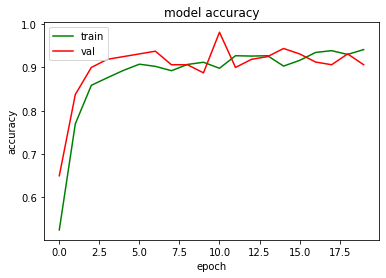

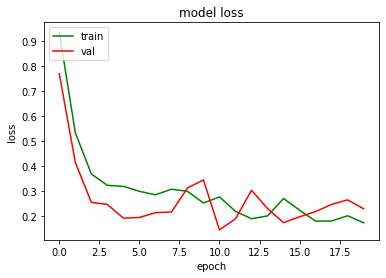

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='green')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving x-ray-COVID.jpg to x-ray-COVID.jpg
x-ray-COVID.jpg
Positif Covid 19


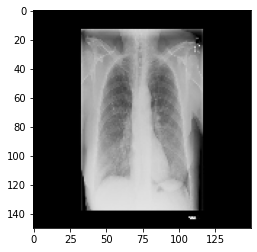

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
    
    #prediksi image
    path = fn
    img = image.load_img(path, target_size = (150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    image = np.vstack([x])
    classes = model.predict(image, batch_size = 32)
    
    print(fn)
    if classes[0,0] != 0:
        print('Positif Covid 19')
    elif classes[0,1] != 0:
        print('Normal')
    else:
        print('Pneumonia')

In [24]:
# menyimpan model
model.save('covid_cnn_model') 

INFO:tensorflow:Assets written to: covid_cnn_model/assets
